In [1]:
#Importacion de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cargar el archivo CSV 
dataframe = pd.read_csv("datos1.csv")

In [108]:
# Mostrar los primeros registros del DataFrame
dataframe.head(5)

,ciclo_academico,region,porcentaje_de_beca,formas_de_pago,edad,porcentaje_de_discapacidades,numero_discapacidades,numero_reprobaciones,aab1_nota,acdb1_nota,...,Estatus_curso,Discapacidad,Status,Tipo_de_pago,Descripcion_beca,Descripcion_descuento,Convenios_contratos,Formas_pago,Tipo_discapacidad,Curso
0,6,0,10.0,1,24.0,0,0,0,3.05,3.5,...,0,0,0,2,0,0,0,1,4,28
1,6,0,10.0,1,24.0,0,0,0,2.81,3.5,...,0,0,0,2,0,0,0,1,4,24
2,6,0,10.0,1,24.0,0,0,0,2.69,3.5,...,0,0,0,2,0,0,0,1,4,25
3,6,0,10.0,1,24.0,0,0,0,1.97,3.5,...,0,0,0,2,0,0,0,1,4,26
4,6,0,10.0,1,24.0,0,0,0,2.64,3.5,...,0,0,0,2,0,0,0,1,4,27


Verificamos que no existan datos nulos


In [60]:
null_counts = dataframe.isnull().mean() * 100
# Ordenar los porcentajes de valores nulos de forma descendente
null = null_counts.sort_values(ascending=False)
# Obtener los valores más altos
v = null.head(410)
# Imprimir los valores más altos
print(v.round(2))

ciclo_academico                 0.0
tasa_aprobacion                 0.0
Tipo_discapacidad               0.0
Formas_pago                     0.0
Convenios_contratos             0.0
Descripcion_descuento           0.0
Descripcion_beca                0.0
Tipo_de_pago                    0.0
Status                          0.0
Discapacidad                    0.0
Estatus_curso                   0.0
Tipo_de_ingreso                 0.0
Tipo_de_est_programa            0.0
Sexo                            0.0
final_nota                      0.0
region                          0.0
apeb2_nota                      0.0
acdb2_nota                      0.0
aab2_nota                       0.0
apeb1_nota                      0.0
acdb1_nota                      0.0
aab1_nota                       0.0
numero_reprobaciones            0.0
numero_discapacidades           0.0
porcentaje_de_discapacidades    0.0
edad                            0.0
formas_de_pago                  0.0
porcentaje_de_beca          

Visualizamos la correlacion que existen en nuevas variables finales

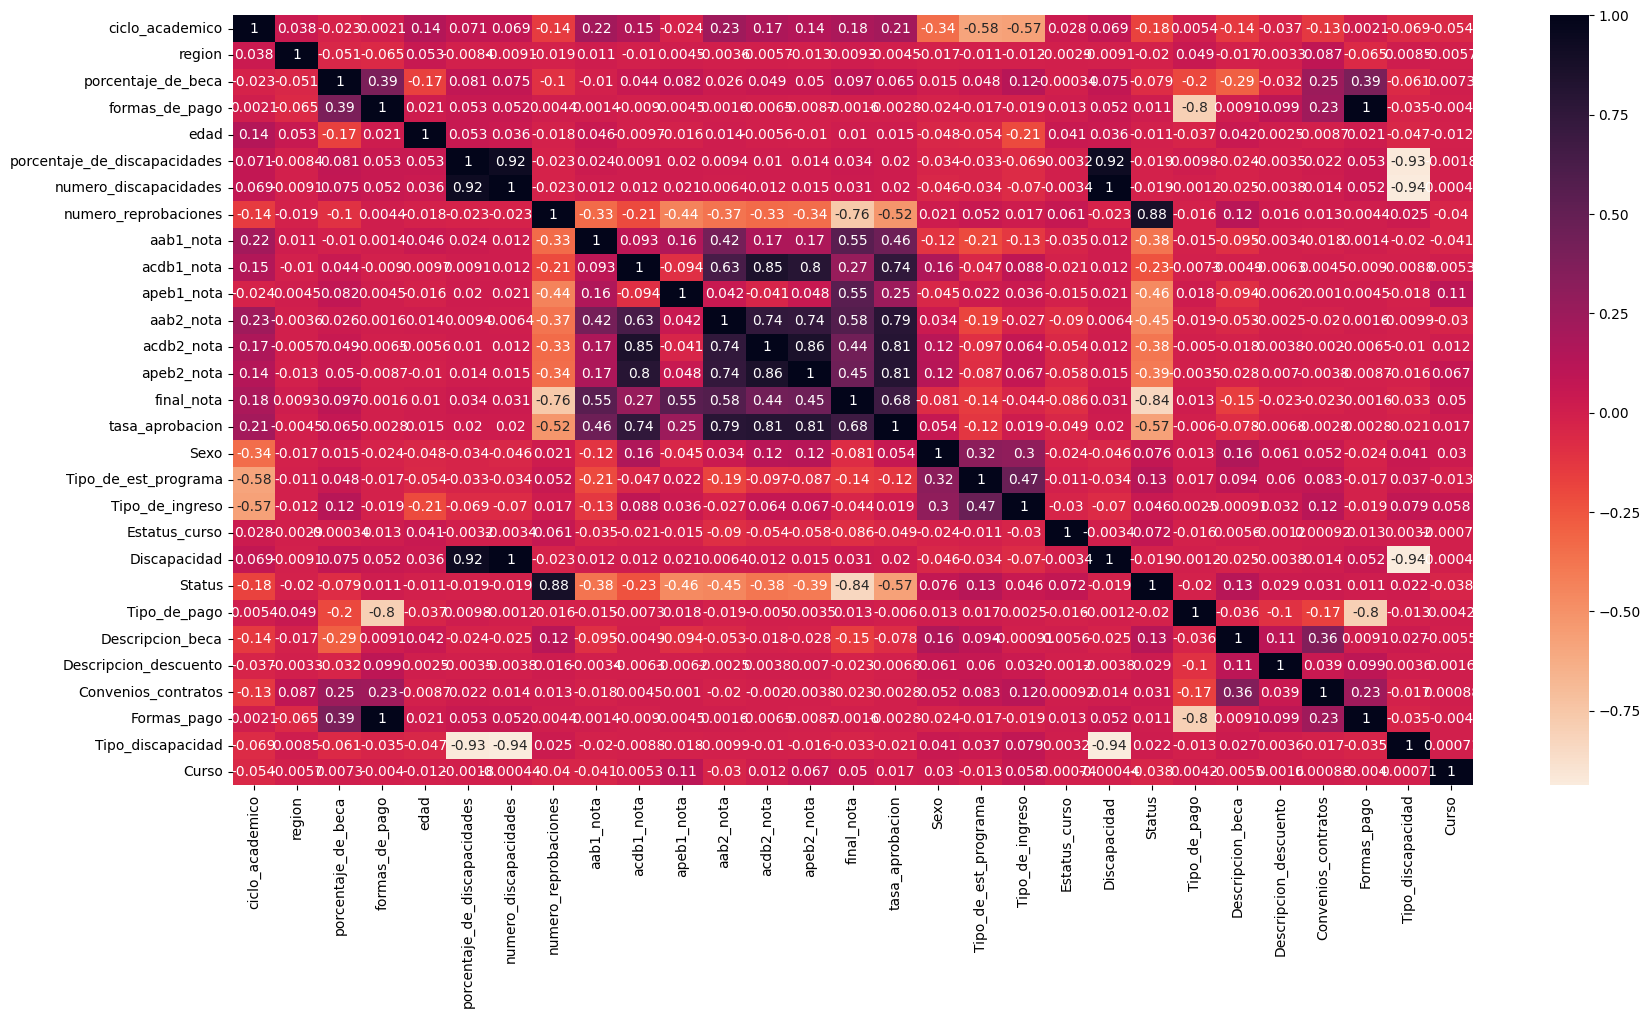

In [5]:
correlation = dataframe.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='rocket_r')

# Mostrar el gráfico
plt.show()

Eliminamos las columnas irrelevantes

In [3]:
del dataframe['numero_reprobaciones']
del dataframe['numero_discapacidades']
del dataframe['porcentaje_de_discapacidades']
del dataframe['formas_de_pago']
del dataframe['final_nota']
del dataframe['tasa_aprobacion']

División de Datos

In [4]:
###spliting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
#Balanceo de los datos
undersample = RandomUnderSampler(random_state=42)
# Dividir los datos en caracteristicas de entrada y de destino
# Features
x = dataframe.drop("Status" , axis=1)
x.info()
y = dataframe['Status']
y.info()# Target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22823 entries, 0 to 22822
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ciclo_academico        22823 non-null  int64  
 1   region                 22823 non-null  int64  
 2   porcentaje_de_beca     22823 non-null  float64
 3   edad                   22823 non-null  float64
 4   aab1_nota              22823 non-null  float64
 5   acdb1_nota             22823 non-null  float64
 6   apeb1_nota             22823 non-null  float64
 7   aab2_nota              22823 non-null  float64
 8   acdb2_nota             22823 non-null  float64
 9   apeb2_nota             22823 non-null  float64
 10  Sexo                   22823 non-null  int64  
 11  Tipo_de_est_programa   22823 non-null  int64  
 12  Tipo_de_ingreso        22823 non-null  int64  
 13  Estatus_curso          22823 non-null  int64  
 14  Discapacidad           22823 non-null  int64  
 15  Ti

Preprocesamiento del conjunto de datos

In [5]:
# Estandarizamos el conjunto de datos
scaler = StandardScaler()
dataframe = scaler.fit_transform(x)

División del conjunto de datos de entrenamiento y prueba

In [6]:
#Dividir en conjunto de entrenamiento(train) y prueba(test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=0)
#visualizamos cuantos datos vamos a tener en prueba y entrenamiento
print("shape")
print("x_train", X_train.shape)
print("x_test",X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

shape
x_train (18258, 22)
x_test (4565, 22)
y_train (18258,)
y_test (4565,)


Balanceo de datos 

In [ ]:
print(dataframe['Status'].value_counts())
ax = dataframe['Status'].value_counts().plot(kind='bar', figsize=(10,6))
ax.set_title('Status')
ax.set_ylabel('Número de aprobados y reprobados', fontsize=14)

In [8]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 15324, 1: 2934})


In [9]:
subsample = RandomUnderSampler()
x_new, y_new = subsample.fit_resample(X_train, y_train)

print("Shape")
print("x_new", x_new.shape)
print("y_new", y_new.shape)

Shape
x_new (5868, 22)
y_new (5868,)


In [10]:
counter = Counter(y_new)
print(counter)

Counter({0: 2934, 1: 2934})


In [11]:
#construir un arreglo donde se guardaran todos los modelos
#para hacer una comparación de todos, para ver cual da mejor
#resultado
compare_models_accuracy = {}

Modelo de Regresión Logística

In [12]:
#importamos las librerias
from sklearn.linear_model import LogisticRegression
# Creata el modelo de Regresión Logística
lr_model = LogisticRegression()
#Construimos el modelo sobre los datos de entrenamiento
lr_model.fit(x_new, y_new)

C:\Users\A S U S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#predecimos las probabilidades
y_pred = lr_model.predict(X_test)

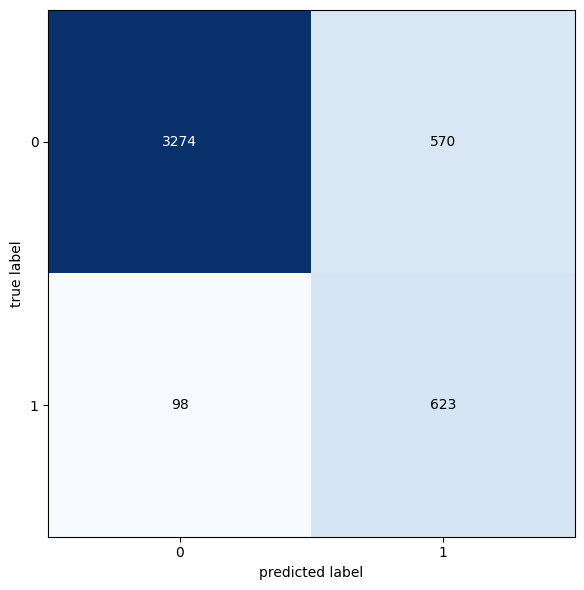

In [14]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
#agregamos la evaluación del modelo a nuestro arreglo
compare_models_accuracy["logistic_regression"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#realizamos la matriz de confusión
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8536692223439212

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      3844
           1       0.52      0.86      0.65       721

    accuracy                           0.85      4565
   macro avg       0.75      0.86      0.78      4565
weighted avg       0.90      0.85      0.87      4565


Confusion Matrix:
 [[3274  570]
 [  98  623]]


In [18]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3274  570]
 [  98  623]]
Precisión del modelo:
0.5222129086336965
Exactitud del modelo:
0.8536692223439212
Sensibilidad del modelo:
0.8640776699029126
Especifidad del modelo:
0.8517169614984391
Puntaje F1 del modelo:
0.6509926854754441
Curva ROC - AUC del modelo:
0.857897315700676


Modelo de Árbol de Desicióm

In [17]:
from sklearn.tree import DecisionTreeClassifier
# Creata el modelo de Árbol de Decisión
dtr_model = DecisionTreeClassifier(max_depth=5)
#Construimos el modelo sobre los datos de entrenamiento
dtr_model.fit(x_new, y_new)

DecisionTreeClassifier(max_depth=5)

In [19]:
# Predecimos para los valores del grupo Test
y_pred = dtr_model.predict(X_test)

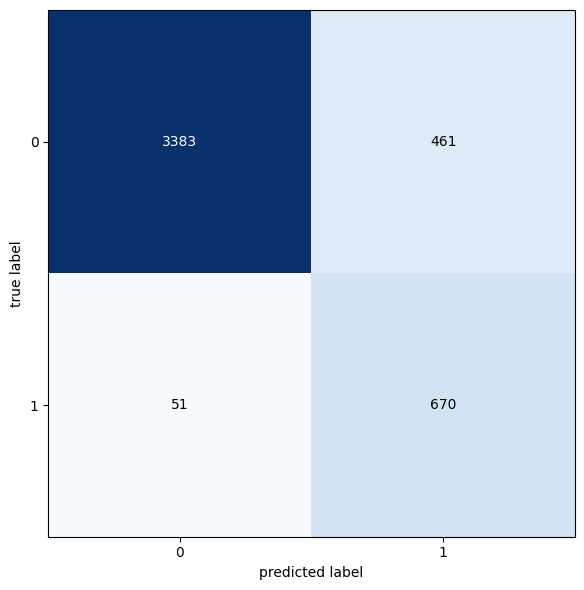

In [20]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [21]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["decision_tree"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.887842278203724

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      3844
           1       0.59      0.93      0.72       721

    accuracy                           0.89      4565
   macro avg       0.79      0.90      0.83      4565
weighted avg       0.92      0.89      0.90      4565


Confusion Matrix:
 [[3383  461]
 [  51  670]]


In [22]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3383  461]
 [  51  670]]
Precisión del modelo:
0.5923961096374889
Exactitud del modelo:
0.887842278203724
Sensibilidad del modelo:
0.9292649098474342
Especifidad del modelo:
0.8800728407908429
Puntaje F1 del modelo:
0.7235421166306696
Curva ROC - AUC del modelo:
0.9046688753191385


[Text(0.5, 0.9166666666666666, 'acdb2_nota <= 2.84\ngini = 0.5\nsamples = 5868\nvalue = [2934, 2934]'),
 Text(0.25, 0.75, 'apeb1_nota <= 3.04\ngini = 0.371\nsamples = 3396\nvalue = [836, 2560]'),
 Text(0.125, 0.5833333333333334, 'apeb2_nota <= 2.155\ngini = 0.281\nsamples = 2934\nvalue = [497, 2437]'),
 Text(0.0625, 0.4166666666666667, 'acdb1_nota <= -0.5\ngini = 0.136\nsamples = 2220\nvalue = [163, 2057]'),
 Text(0.03125, 0.25, 'aab2_nota <= 0.975\ngini = 0.332\nsamples = 405\nvalue = [85, 320]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.203\nsamples = 270\nvalue = [31, 239]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.48\nsamples = 135\nvalue = [54, 81]'),
 Text(0.09375, 0.25, 'acdb2_nota <= 2.185\ngini = 0.082\nsamples = 1815\nvalue = [78, 1737]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.033\nsamples = 1571\nvalue = [26, 1545]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.335\nsamples = 244\nvalue = [52, 192]'),
 Text(0.1875, 0.4166666666666667, 'acdb1_nota <= 

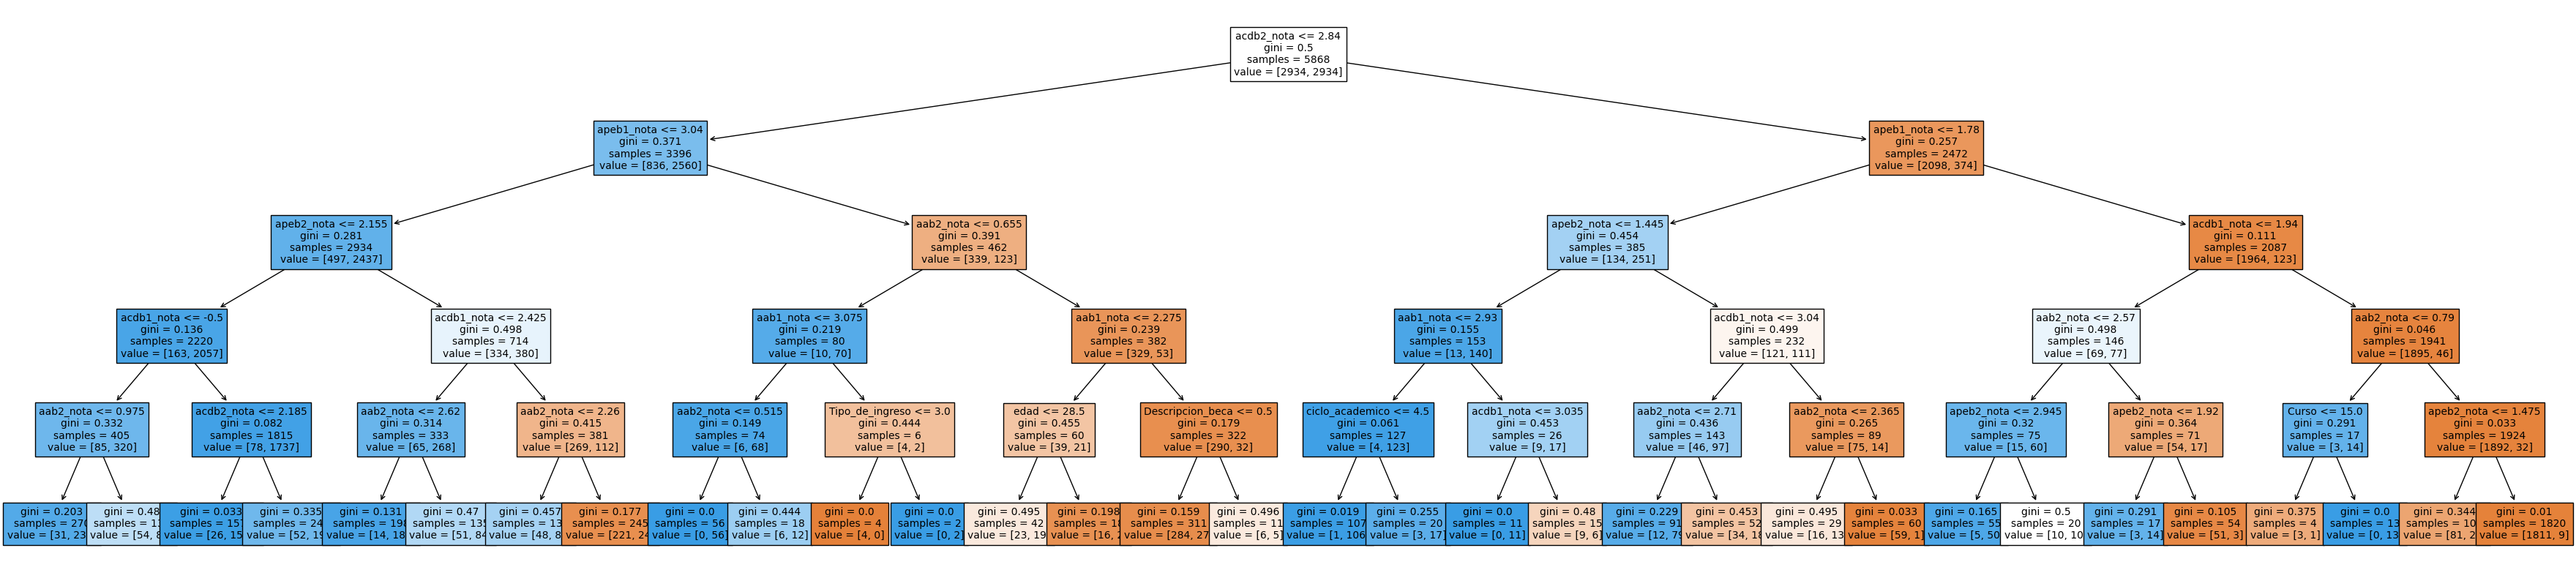

In [137]:
from sklearn.tree import plot_tree

plt.figure(figsize=(45,10))
plot_tree(decision_tree = dtr_model, feature_names= x.columns, filled=True, fontsize= 10)

Modelo Support Vector Machine

In [23]:
from sklearn.svm import SVC
# Crear el modelo de Support Vector Machine
svm_model = SVC()
#Construimos el modelo sobre los datos de entrenamiento
svm_model.fit(x_new, y_new)

SVC()

In [24]:
# Predecimos para los valores del grupo Test
y_pred = svm_model.predict(X_test)

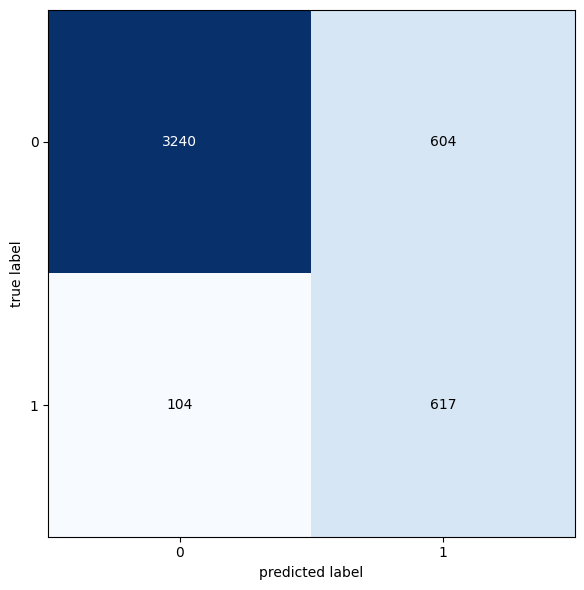

In [25]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [26]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["svm"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8449069003285871

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      3844
           1       0.51      0.86      0.64       721

    accuracy                           0.84      4565
   macro avg       0.74      0.85      0.77      4565
weighted avg       0.90      0.84      0.86      4565


Confusion Matrix:
 [[3240  604]
 [ 104  617]]


In [27]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3240  604]
 [ 104  617]]
Precisión del modelo:
0.5053235053235053
Exactitud del modelo:
0.8449069003285871
Sensibilidad del modelo:
0.855755894590846
Especifidad del modelo:
0.8428720083246618
Puntaje F1 del modelo:
0.635427394438723
Curva ROC - AUC del modelo:
0.849313951457754


Modelo Random Forest (Árboles Aleatorios)

In [28]:
from sklearn.ensemble import RandomForestClassifier
# Creata el modelo de Support Vector Machine
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6)
#Construimos el modelo sobre los datos de entrenamiento
rf_model.fit(x_new, y_new)

RandomForestClassifier(max_depth=6)

In [29]:
# Predecimos para los valores del grupo Test
y_pred = rf_model.predict(X_test)

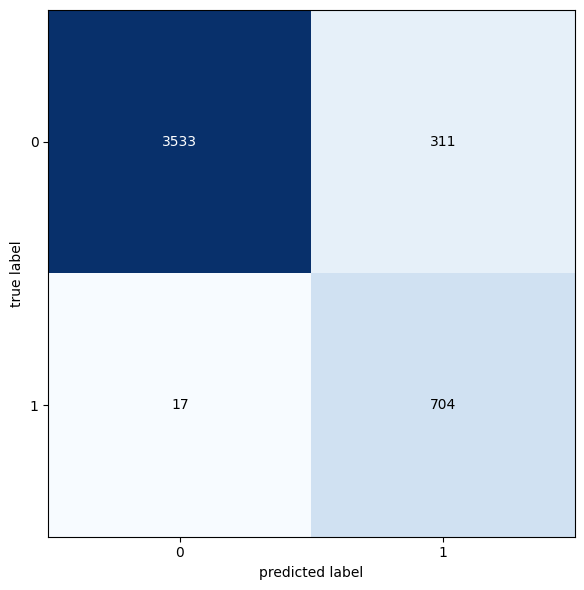

In [30]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [31]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["random_forest"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9281489594742607

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      3844
           1       0.69      0.98      0.81       721

    accuracy                           0.93      4565
   macro avg       0.84      0.95      0.88      4565
weighted avg       0.95      0.93      0.93      4565


Confusion Matrix:
 [[3533  311]
 [  17  704]]


In [32]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3533  311]
 [  17  704]]
Precisión del modelo:
0.6935960591133005
Exactitud del modelo:
0.9281489594742607
Sensibilidad del modelo:
0.9764216366158114
Especifidad del modelo:
0.9190946930280958
Puntaje F1 del modelo:
0.8110599078341014
Curva ROC - AUC del modelo:
0.9477581648219535


Modelo Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
# Creata el modelo de Navive Bayes
nb_model = GaussianNB()
#Construimos el modelo sobre los datos de entrenamiento
nb_model.fit(x_new, y_new)

GaussianNB()

In [34]:
#Realizar predicciones
y_pred = nb_model.predict(X_test)

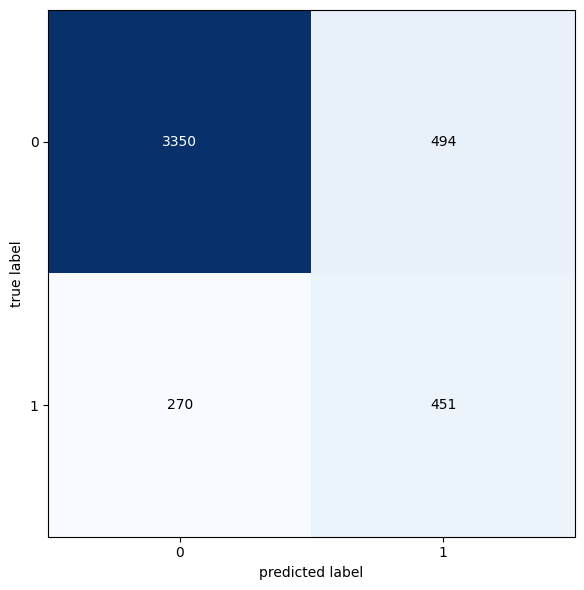

In [35]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [36]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["naive_bayes"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8326396495071194

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      3844
           1       0.48      0.63      0.54       721

    accuracy                           0.83      4565
   macro avg       0.70      0.75      0.72      4565
weighted avg       0.85      0.83      0.84      4565


Confusion Matrix:
 [[3350  494]
 [ 270  451]]


In [37]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3350  494]
 [ 270  451]]
Precisión del modelo:
0.47724867724867726
Exactitud del modelo:
0.8326396495071194
Sensibilidad del modelo:
0.6255201109570042
Especifidad del modelo:
0.8714880332986472
Puntaje F1 del modelo:
0.5414165666266507
Curva ROC - AUC del modelo:
0.7485040721278258


Modelo K-NN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# Creamos el modelo de K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
#Construimos el modelo sobre los datos de entrenamiento
knn_model.fit(x_new, y_new)


KNeighborsClassifier()

In [39]:
#Realizar predicciones
y_pred = knn_model.predict(X_test)

C:\Users\A S U S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\A S U S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


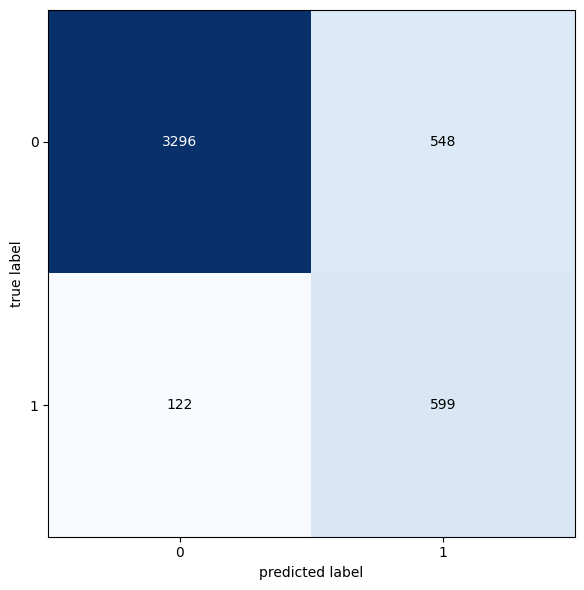

In [40]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [41]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["K-NN"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8532311062431545

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      3844
           1       0.52      0.83      0.64       721

    accuracy                           0.85      4565
   macro avg       0.74      0.84      0.77      4565
weighted avg       0.89      0.85      0.87      4565


Confusion Matrix:
 [[3296  548]
 [ 122  599]]


In [42]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3296  548]
 [ 122  599]]
Precisión del modelo:
0.5222319093286836
Exactitud del modelo:
0.8532311062431545
Sensibilidad del modelo:
0.8307905686546463
Especifidad del modelo:
0.8574401664932362
Puntaje F1 del modelo:
0.6413276231263383
Curva ROC - AUC del modelo:
0.8441153675739412


Comparación de los modelos

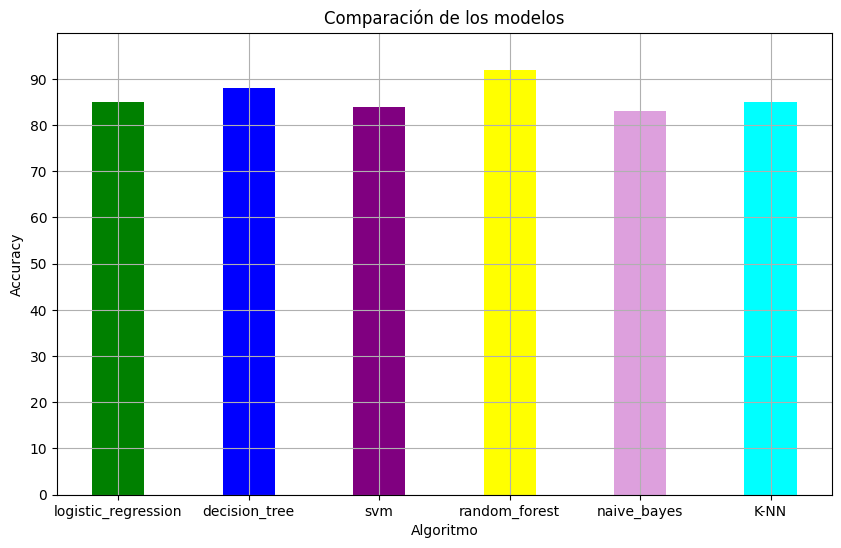

In [43]:
from matplotlib import colors
x = list(compare_models_accuracy.keys())
y = list(compare_models_accuracy.values())
colors= ['green','blue','purple','yellow', 'plum', 'aqua'] # Colores de los items

plt.figure(figsize=(10 ,6))
plt.title("Comparación de los modelos")
plt.grid(True)
plt.bar( x , y ,color = colors, width=0.4 )
plt.xlabel('Algoritmo')
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Set the y-axis limits
plt.yticks(np.arange(0, 100, 10)) 
plt.show()